In [1]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [2]:
import numpy as np

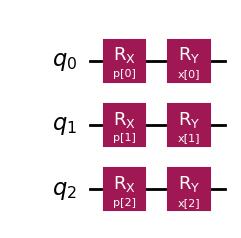

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',3)
x = ParameterVector('x',3)

qc = QuantumCircuit(3)

qc.rx(p[0],0)
qc.rx(p[1],1)
qc.rx(p[2],2)

qc.ry(x[0],0)
qc.ry(x[1],1)
qc.ry(x[2],2)

qc.rx(np.cos(p[0]),0)
qc.rx(np.sin(p[1]),1)
qc.rx(2.0*p[2],2)


#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [4]:
# from squlearn.encoding_circuit import HubregtsenEncodingCircuit
# from qiskit.circuit import ParameterVector



# pqc = HubregtsenEncodingCircuit(3,2,2)

# p = ParameterVector('p',3)
# x = ParameterVector('x',pqc.num_features)

# qc = pqc.get_circuit(p,x)
# qc.draw()

In [5]:
#print(pqc.num_parameters)
#print(pqc.num_features)

In [6]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._free_parameters",test._free_parameters)

self._qiskit_circuit      ┌──────────┐┌──────────┐
q_0: ┤ Rx(p[0]) ├┤ Ry(x[0]) ├
     ├──────────┤├──────────┤
q_1: ┤ Rx(p[1]) ├┤ Ry(x[1]) ├
     ├──────────┤├──────────┤
q_2: ┤ Rx(p[2]) ├┤ Ry(x[2]) ├
     └──────────┘└──────────┘
wires [0]
len(op.operation.params) 1
angle p[0]
type(angle) <class 'qiskit.circuit.parametervector.ParameterVectorElement'>
TESTTEST
wires [0]
len(op.operation.params) 1
angle x[0]
type(angle) <class 'qiskit.circuit.parametervector.ParameterVectorElement'>
TESTTEST
wires [1]
len(op.operation.params) 1
angle p[1]
type(angle) <class 'qiskit.circuit.parametervector.ParameterVectorElement'>
TESTTEST
wires [1]
len(op.operation.params) 1
angle x[1]
type(angle) <class 'qiskit.circuit.parametervector.ParameterVectorElement'>
TESTTEST
wires [2]
len(op.operation.params) 1
angle p[2]
type(angle) <class 'qiskit.circuit.parametervector.ParameterVectorElement'>
TESTTEST
wires [2]
len(op.operation.params) 1
angle x[2]
type(angle) <class 'qiskit.circuit.parametervector.Param

In [7]:
test.get_circuit_func()

self._qualcs_gates_parameters ['p', 'x']


<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(*args)>

In [8]:
np.random.seed(42)
param_val = np.array(np.random.random(3))
x_val = np.array(np.random.random(3))

circ = test.get_circuit_func()(param_val,x_val)

state = QuantumState(3)
sim = QuantumCircuitSimulator(circ, state)
sim.initialize_state(0)
sim.simulate()

observable = Observable(3)
observable.add_operator(1.0, "Z 2 Z 1 Z 0")

print(sim.get_expectation_value(observable))



self._qualcs_gates_parameters ['p', 'x']
circ_param_list [0.3745401188473625, 0.9507143064099162, 0.7319939418114051, 0.5986584841970366, 0.15601864044243652, 0.15599452033620265]
Adding Parameterized RX gate with angle 0.3745401188473625 on qubit 0
Adding Parameterized RY gate with angle 0.5986584841970366 on qubit 0
Adding Parameterized RX gate with angle 0.9507143064099162 on qubit 1
Adding Parameterized RY gate with angle 0.15601864044243652 on qubit 1
Adding Parameterized RX gate with angle 0.7319939418114051 on qubit 2
Adding Parameterized RY gate with angle 0.15599452033620265 on qubit 2
(0.32430061799619225+0j)


In [9]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

val = np.concatenate([param_val,x_val])

est = Estimator()

est.run(qc,SparsePauliOp('ZZZ',),val).result().values

C:\Users\DKR\AppData\Local\Temp\ipykernel_26156\3824211868.py:6: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  est = Estimator()


array([0.32430062])